#설정 코드


In [1]:
!pip install --upgrade openai
!pip install openai requests pillow python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.1/599.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.68.2
    Uninstalling openai-1.68.2:
      Successfully uninstalled openai-1.68.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 성능 확인용 기본 프롬프트 (이건 실행 안해도 댐)


📌 [레트로] 1016530.jpg
The outfit is styled with white sneakers featuring a classic lace-up design. This casual look evokes a playful spirit, perfect for a relaxed afternoon picnic in the park.
--------------------------------------------------------------------------------


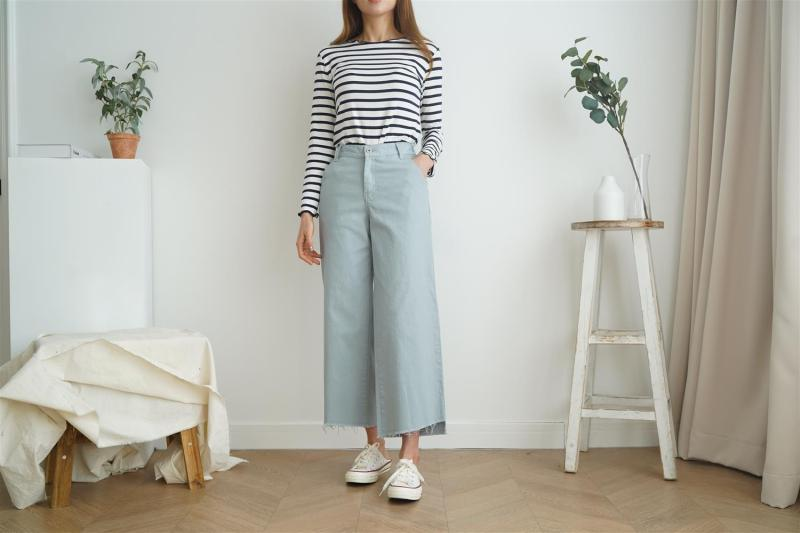

📌 [레트로] 1016553.jpg
The outfit is styled with white canvas sneakers featuring a classic lace-up design. This casual look evokes a fresh playfulness, perfect for a weekend café outing.
--------------------------------------------------------------------------------


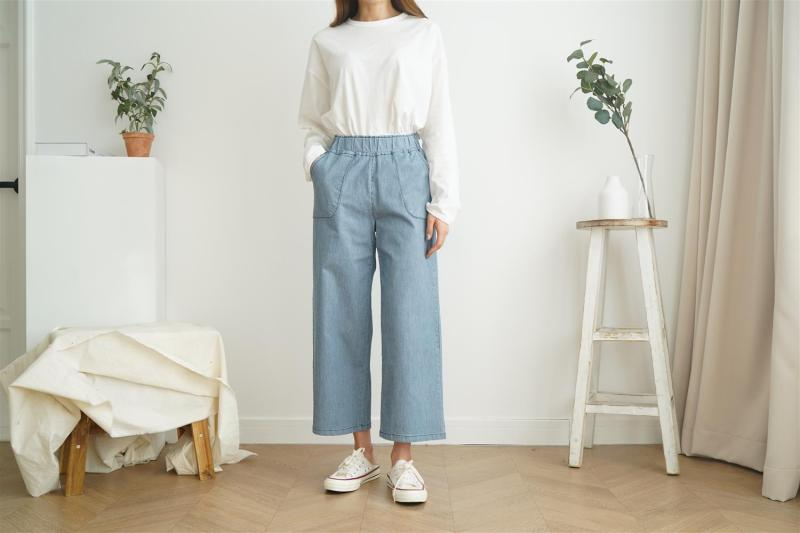

📌 [레트로] 1016618.jpg
The outfit is styled with classic white canvas sneakers featuring a minimal low-top design. This casual look evokes fresh playfulness, perfect for a carefree weekend getaway.
--------------------------------------------------------------------------------


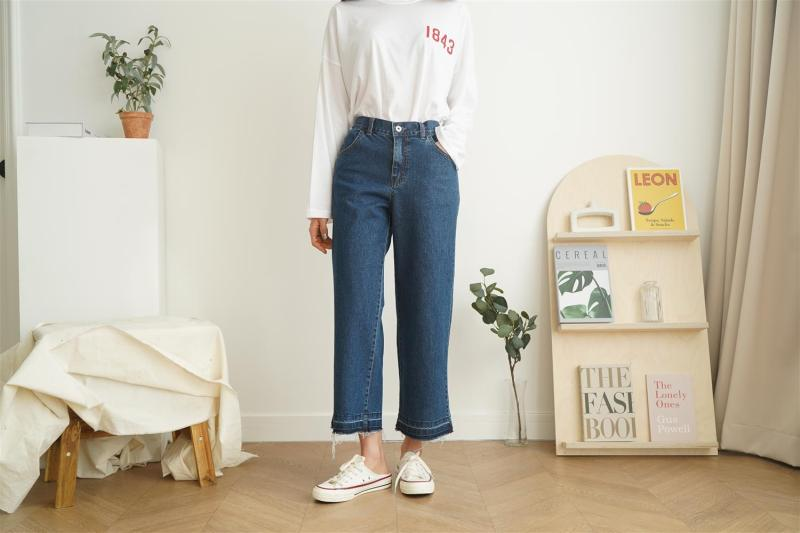

📌 [레트로] 1028690.jpg
This chic look evokes a gentle serenity, perfect for a cozy afternoon café outing.
--------------------------------------------------------------------------------


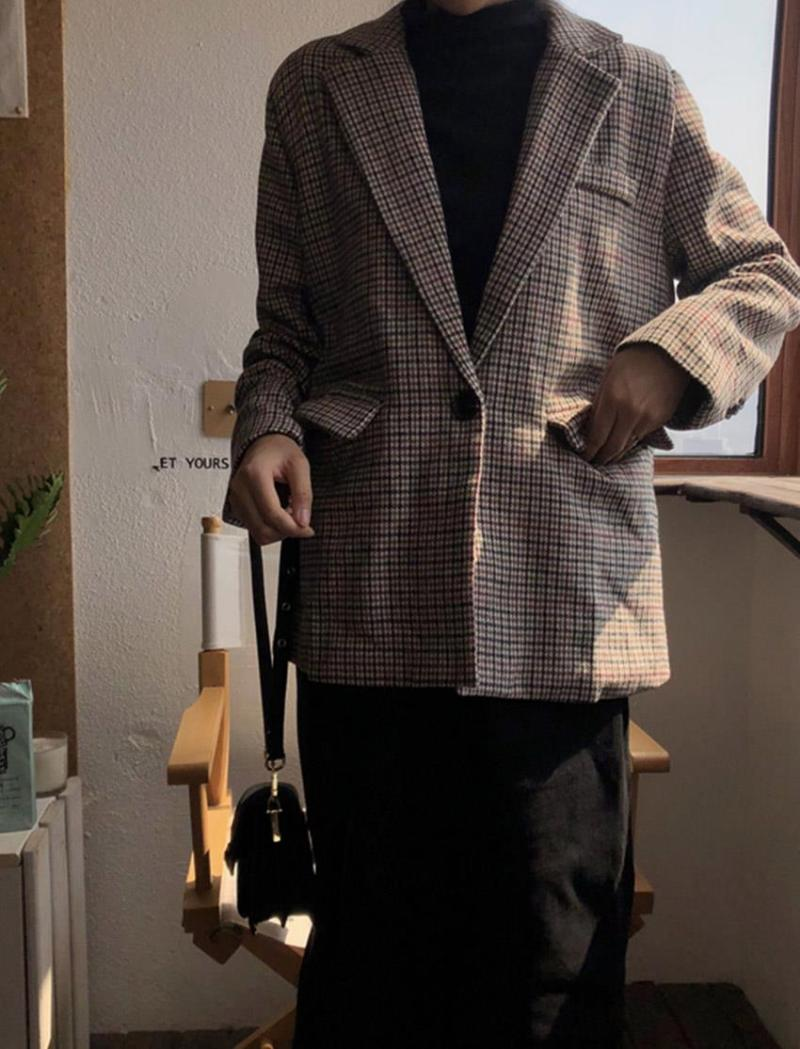

📌 [레트로] 1029079.jpg
This chic look evokes gentle tranquility, perfect for a stylish office day.
--------------------------------------------------------------------------------


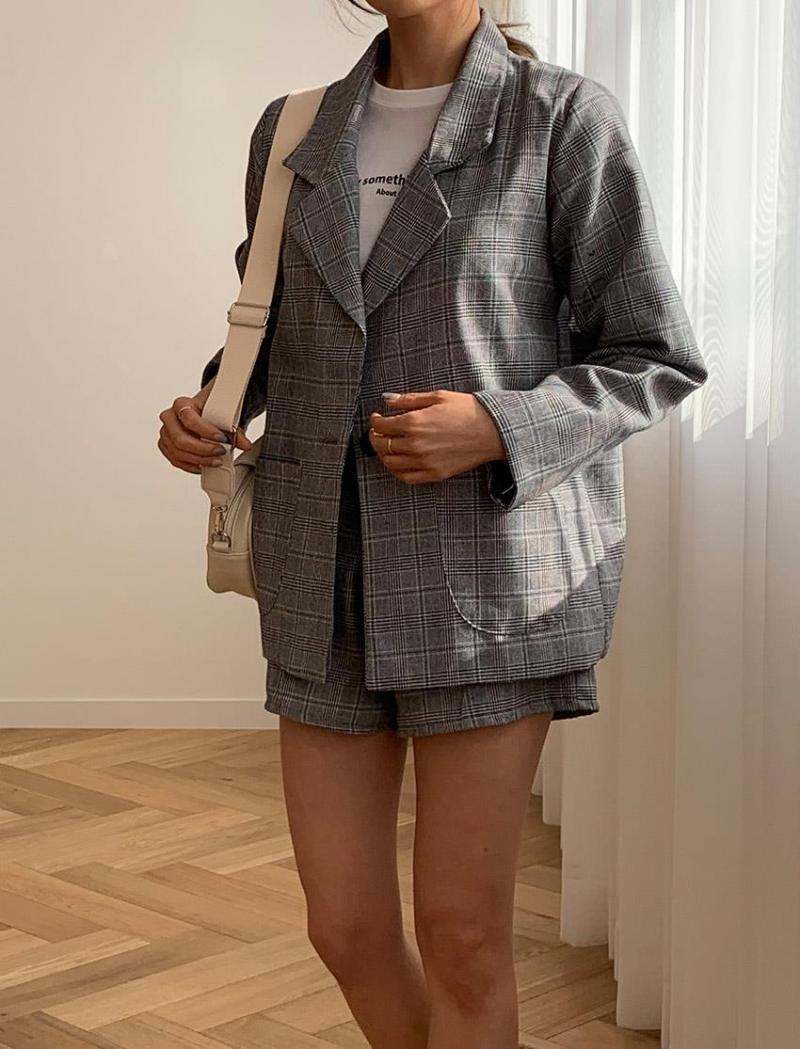

📌 [레트로] 1029101.jpg
This chic look evokes dreamy elegance, perfect for a stylish office day.
--------------------------------------------------------------------------------


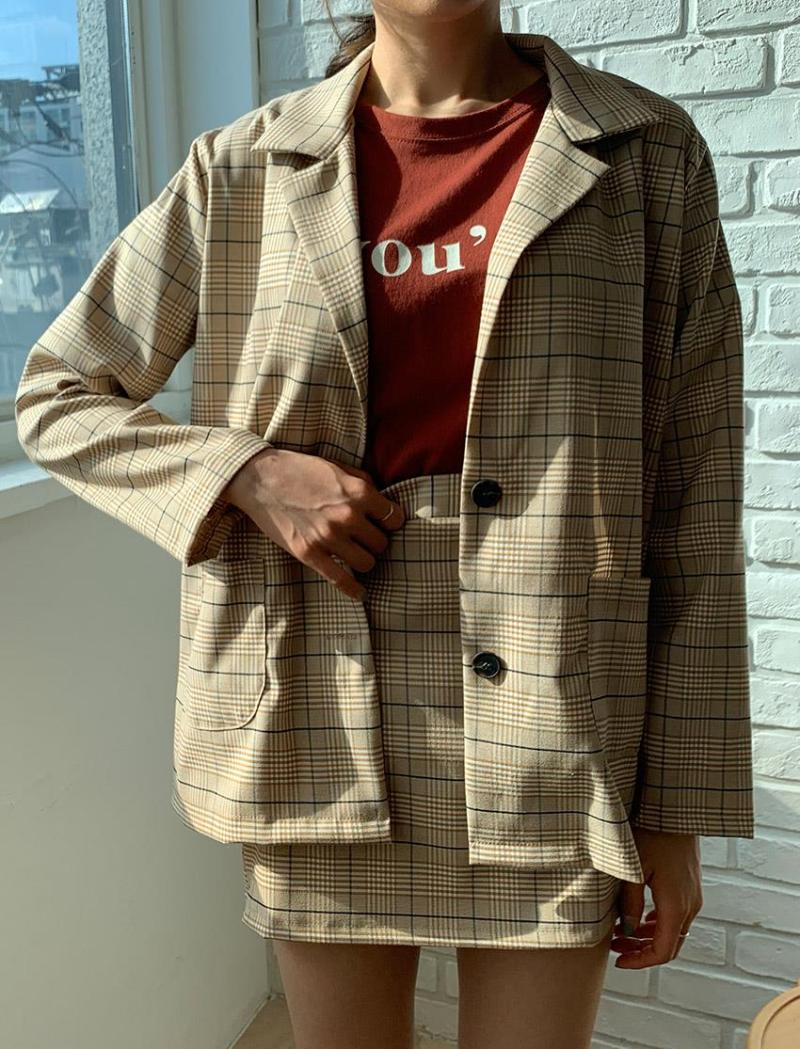

📌 [레트로] 1029473.jpg
The outfit is styled with white canvas sneakers featuring a classic low-top design. This chic look evokes gentle tranquility, perfect for a casual café outing in spring.
--------------------------------------------------------------------------------


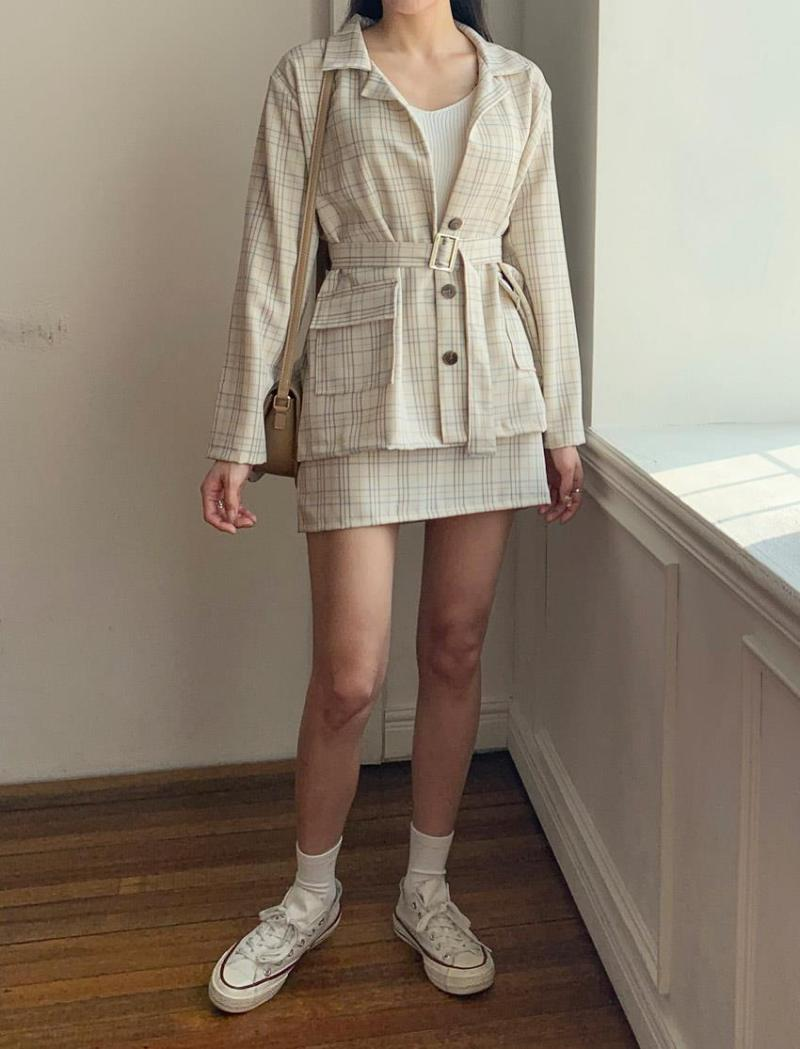

📌 [레트로] 1029756.jpg
The outfit is styled with white canvas sneakers featuring a classic lace-up design. This casual look evokes fresh playfulness, perfect for a weekend café outing.
--------------------------------------------------------------------------------


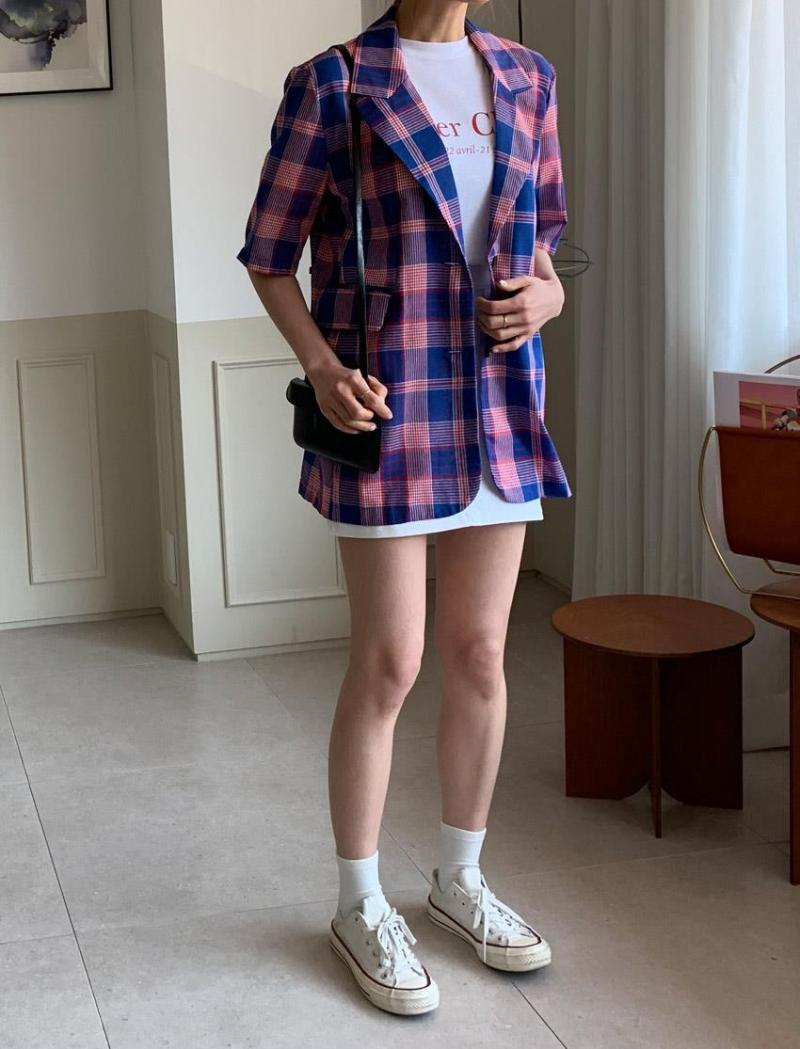

📌 [레트로] 1030283.jpg
The outfit is styled with cream loafers featuring metallic accents and a sleek design. This casual look evokes fresh playfulness, perfect for a chic urban café outing.
--------------------------------------------------------------------------------


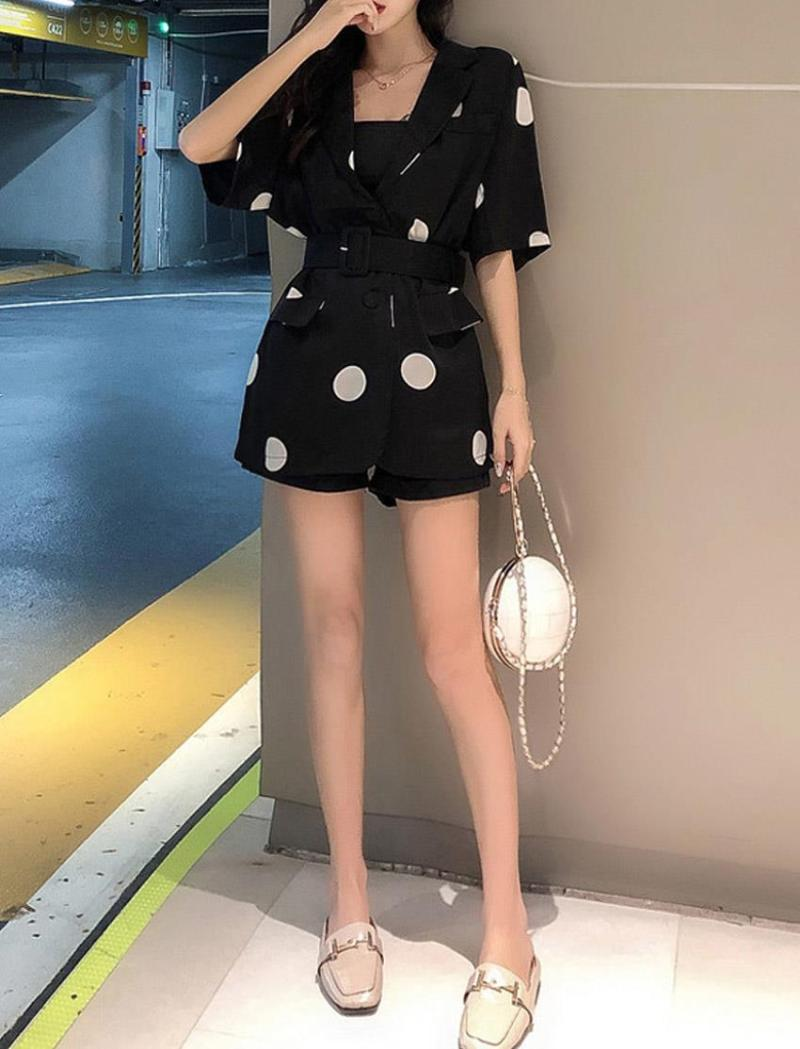

📌 [레트로] 1032387.jpg
The outfit is styled with brown loafers featuring a classic design and comfortable fit. This vintage look evokes nostalgic elegance, perfect for a cozy autumn café outing.
--------------------------------------------------------------------------------


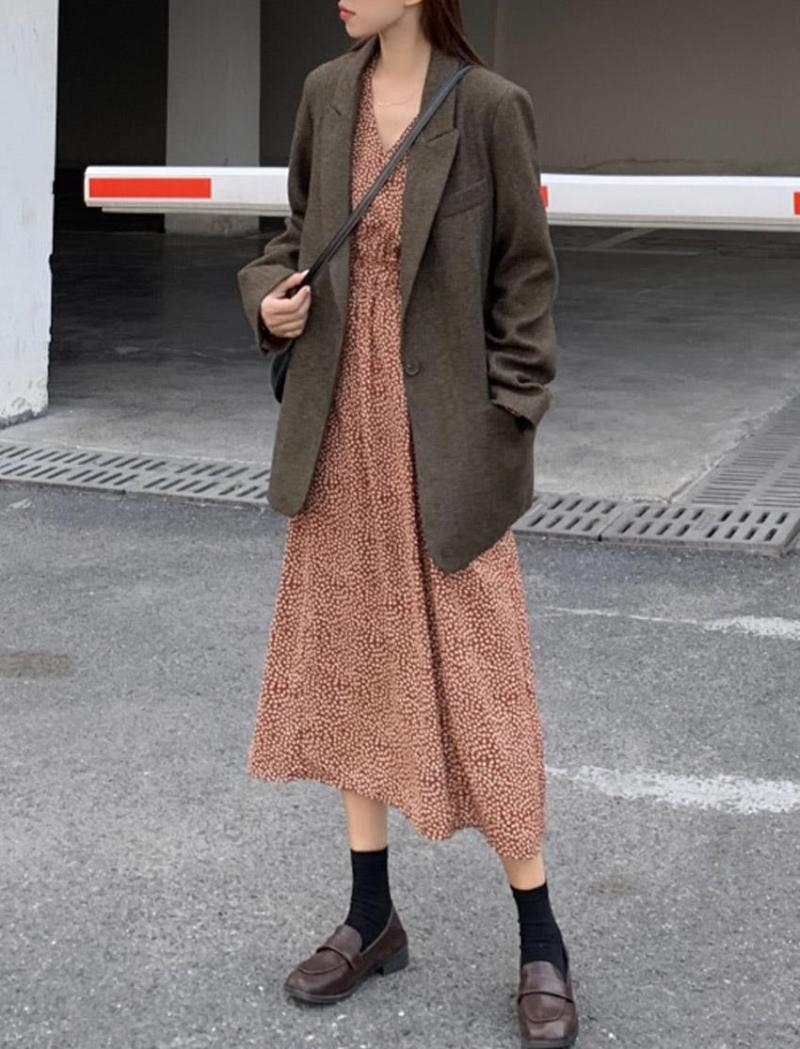



🔍 전체 캡션 요약 (비교용)

📌 1016530.jpg
The outfit is styled with white sneakers featuring a classic lace-up design. This casual look evokes a playful spirit, perfect for a relaxed afternoon picnic in the park.
------------------------------------------------------------
📌 1016553.jpg
The outfit is styled with white canvas sneakers featuring a classic lace-up design. This casual look evokes a fresh playfulness, perfect for a weekend café outing.
------------------------------------------------------------
📌 1016618.jpg
The outfit is styled with classic white canvas sneakers featuring a minimal low-top design. This casual look evokes fresh playfulness, perfect for a carefree weekend getaway.
------------------------------------------------------------
📌 1028690.jpg
This chic look evokes a gentle serenity, perfect for a cozy afternoon café outing.
------------------------------------------------------------
📌 1029079.jpg
This chic look evokes gentle tranquility, perfect for a stylish office da

In [20]:
import os
import base64
from IPython.display import Image, display
from openai import OpenAI

# OpenAI 클라이언트
client = OpenAI(api_key='')  # API 키 입력

# 이미지 폴더 경로
image_dir = "/content/drive/MyDrive/25-1/URP (정.복.자)/레트로"

# 지정된 이미지 파일 목록
retro_images = [
    "1016530.jpg", "1016553.jpg", "1016618.jpg", "1028690.jpg", "1029079.jpg",
    "1029101.jpg", "1029473.jpg", "1029756.jpg", "1030283.jpg", "1032387.jpg"
]

# Base64 인코딩 함수
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode("utf-8")

# 캡션 저장용 딕셔너리
caption_dict = {}

# 이미지 순회하며 캡셔닝
for filename in retro_images:
    image_path = os.path.join(image_dir, filename)
    image_base64 = encode_image(image_path)

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": """
    prompt = '''
You are a creative fashion image captioning assistant. Generate a two-sentence description of a fashion outfit based on the image.

If shoes or footwear are clearly visible: Describe the footwear factually using this exact format:
  'The outfit is styled with [type of footwear] featuring [notable characteristics].'

If footwear is not visible or cannot be identified: Skip the first sentence.

Always include this sentence: Add a stylized, emotional summary using this exact format: 'This [style] look evokes [mood], perfect for [season]’s [setting].'

To encourage variety and consistency, follow these expression banks:
Use the [style] to guide the selection of [mood] from its matching group. Do not reuse the same word across multiple generations. Be creative, polished, and fashion-forward.

[Style → Recommended Mood Group]
• sexy → Bold & Edgy(bold, fierce, rebellious, confident, daring, sharp)
• elegant → Chic & Sophisticated(elegant, refined, polished, timeless, understated)
• casual → Youthful & Playful(playful, spirited, fresh, bubbly, carefree)
• chic → Chic & Sophisticated / Soft & Serene(dreamy, tranquil, poetic, gentle, graceful, airy)
• vintage → Romantic & Feminine(romantic, sweet, whimsical, delicate, nostalgic) / Soft & Serene
• minimalist → Soft & Serene / Chic & Sophisticated
• street → Bold & Edgy / Youthful & Playful
• preppy → Youthful & Playful / Romantic & Feminine

[Setting Bank – time/place/occasion examples]
daily wear, a casual café outing, a weekend getaway, a beach day, a picnic in the park, a morning run, a mountain hike, a school day, a yoga session, a romantic date, a stroll on campus, a stylish office day, a cozy camping trip, a summer festival, a wedding ceremony, a first date, a casual tennis match, a day at the pool, a confident interview, a formal family gathering

—
Example Outputs:
- The outfit is styled with white two-strap flat sandals featuring a minimal open-toe design. This minimalist look evokes poetic softness, perfect for a summer afternoon gallery stroll.
- This vintage look evokes whimsical charm, perfect for an early autumn countryside wedding.
- The outfit is styled with black leather ankle boots featuring a pointed toe and zipper trim. This sexy look evokes fierce confidence, perfect for a rooftop evening soirée.
- The outfit is styled with off-white ankle boots featuring a matte finish and minimal silhouette. This romantic look evokes vintage whimsy, perfect for a golden-hued autumn bookstore visit.
'''
"""
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{image_base64}"
                        }
                    }
                ]
            }
        ],
        max_tokens=150,
        temperature=1.0
    )

    # 캡션 추출 및 저장
    caption = response.choices[0].message.content
    caption_dict[filename] = caption

    # 개별 출력
    print(f"📌 [레트로] {filename}")
    print(caption)
    print("-" * 80)
    display(Image(filename=image_path))

# 전체 요약 출력 (유사성 체크용)
print("\n\n🔍 전체 캡션 요약 (비교용)\n")
for fname, caption in caption_dict.items():
    print(f"📌 {fname}")
    print(caption)
    print("-" * 60)


#API Batch



## 단일 이미지 batch api 이용

In [ ]:
import openai
import json
import base64
import os

openai.api_key = ''
# 이미지 Base64 인코딩 함수
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

# 이미지 경로 리스트
image_paths = ["/content/스크린샷 2025-03-25 003251.png"]

# 요청을 개별 JSONL 파일로 준비
requests_data = []

for path in image_paths:
    image_base64 = encode_image(path)
    request = {
        "custom_id": os.path.basename(path),
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o",
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": """
    You are creative fashion image captioning assist. Generate a only one sentence description for a fashion outfit.

    Create a sentence that describes an mood or style shown in the imgae. Use this format: "This look evokes [mood], perfect for [seaseons]’s [setting(TPO)]."
      -[mood] emotional tone the outfit conveys (e.g., relaxed, bold, dreamy, elegant)
      -[setting] the type of occasion or location the outfit is suited for (e.g., weekend brunch, evening event, beach escape, campus, picnic, religious event)
      -[seasons] The season or seasonal atmosphere the outfit is suited for. (e.g., spring, summer, autumn, winter, or seasonal vibes like "late-summer" or "early fall")

    Here are some examples:
    - A city-chic look that evokes effortless elegance, perfect for a crisp urban evening."
    - A romantic summer look that evokes breezy charm, perfect for a carefree countryside afternoon."
    """},
                        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_base64}"}}
                    ]
                }
            ],
            "max_tokens": 150,
            "temperature": 0.7
        }
    }
    requests_data.append(request)

# JSONL 파일 저장
jsonl_file = "batch_requests.jsonl"
with open(jsonl_file, "w", encoding="utf-8") as file:
    for entry in requests_data:
        file.write(json.dumps(entry, ensure_ascii=False) + "\n")

# 파일 업로드 (중요 변경 부분!)
uploaded_file = openai.files.create(
    file=open(jsonl_file, "rb"),
    purpose="batch"
)

# 배치 API 호출 (수정된 부분!)
batch = openai.batches.create(
    input_file_id=uploaded_file.id,  # input_file 대신 input_file_id 사용
    endpoint="/v1/chat/completions",
    completion_window="24h"
)

print(f"Batch created with ID: {batch.id}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/스크린샷 2025-03-25 003251.png'

## 다중 이미지 batch api 이용

In [ ]:
import openai
import json
import base64
import os

openai.api_key = ''

# 이미지 Base64 인코딩 함수
def encode_image(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')



# 폴더 경로
folder_path = "/content/drive/MyDrive/25-1/URP (정.복.자)/레트로"

# 숫자 범위 기반 이미지 파일 리스트 생성
image_paths = []
for num in range(100307, 100408):  # 100307 ~ 100407
    file_path = os.path.join(folder_path, f"{num}.jpg")
    if os.path.exists(file_path):  # 실제 존재하는 파일만
        image_paths.append(file_path)


# # 사용할 이미지들 리스트
# image_paths = [
#     "/content/스크린샷 2025-03-18 135556.png",
#     "/content/스크린샷 2025-03-25 003251.png",
#     # 여기에 이미지 경로 추가 가능
# ]

# 공통 프롬프트 설정 (모든 이미지에 동일 적용)
common_prompt = """
You are creative fashion image captioning assistant. Generate only one sentence description for a fashion outfit.

Create a sentence that describes a mood or style shown in the image. Use this format: "This look evokes [mood], perfect for [season]’s [setting(TPO)]."
  - [mood]: emotional tone the outfit conveys (e.g., relaxed, bold, dreamy, elegant)
  - [setting]: the type of occasion or location the outfit is suited for (e.g., weekend brunch, evening event, beach escape, campus, picnic, religious event)
  - [season]: the season or seasonal atmosphere the outfit is suited for (e.g., spring, summer, autumn, winter, or seasonal vibes like "late-summer" or "early fall")

Here are some examples:
- "A city-chic look that evokes effortless elegance, perfect for a crisp urban evening."
- "A romantic summer look that evokes breezy charm, perfect for a carefree countryside afternoon."
"""

# 요청 데이터를 JSONL로 생성
requests_data = []

for path in image_paths:
    image_base64 = encode_image(path)
    request = {
        "custom_id": os.path.basename(path),
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o",
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": common_prompt},
                        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_base64}"}}
                    ]
                }
            ],
            "max_tokens": 150,
            "temperature": 0.7
        }
    }
    requests_data.append(request)

# JSONL 파일 저장
jsonl_file = "batch_requests.jsonl"
with open(jsonl_file, "w", encoding="utf-8") as file:
    for entry in requests_data:
        file.write(json.dumps(entry, ensure_ascii=False) + "\n")

# 파일 업로드 및 배치 API 호출
uploaded_file = openai.files.create(
    file=open(jsonl_file, "rb"),
    purpose="batch"
)

batch = openai.batches.create(
    input_file_id=uploaded_file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h"
)

print(f"Batch created with ID: {batch.id}")

# ID 파일로 저장
with open("batch_id.txt", "w") as f:
    f.write(batch.id)


Batch created with ID: batch_67e5d4af0ed08190935ae15a3df3ba14


## 실행 후 결과 확인 및 자동 저장

In [ ]:
#batch_67e5d382ad248190a78fd367955c7c91
#batch_67e18218c7488190942732bfdb18581e -> 여러개
import openai

openai.api_key = ''
# 파일에서 배치 ID 불러오기
with open("batch_id.txt", "r") as f:
    batch_id = f.read().strip()

# 배치 상태 확인
batch = openai.batches.retrieve(batch_id)
print(f"Status: {batch.status}")

if batch.status == "completed":
    result_file_id = batch.output_file_id

    # 결과 다운로드
    result_content = openai.files.content(result_file_id).read()
    with open("batch_result.jsonl", "wb") as file:
        file.write(result_content)

    print("결과가 batch_result.jsonl 파일로 자동 저장되었습니다.")
else:
    print("배치 처리가 아직 완료되지 않았습니다.")


Status: completed
결과가 batch_result.jsonl 파일로 자동 저장되었습니다.


## 자동 저장된 json 파일 읽는 코드

In [ ]:
import json

with open("batch_result.jsonl", "r", encoding="utf-8") as file:
    for line in file:
        response = json.loads(line)
        custom_id = response.get("custom_id")

        # response 안의 status_code를 확인
        if response.get("response", {}).get("status_code") == 200:
            choices = response["response"]["body"].get("choices", [])
            if choices:
                caption = choices[0]["message"]["content"]
                print(f"이미지 '{custom_id}' 캡션:\n{caption}\n")
            else:
                print(f"이미지 {custom_id} 처리 완료했으나 결과가 없습니다.")
        else:
            print(f"이미지 {custom_id} 처리 중 오류 발생:", response.get("error"))


이미지 '스크린샷 2025-03-18 135556.png' 캡션:
"This look evokes a relaxed charm, perfect for summer's weekend brunch."

이미지 '스크린샷 2025-03-25 003251.png' 캡션:
"This look evokes modern sophistication, perfect for autumn’s urban adventures."



이미지 '100307.jpg' 캡션:
"This look evokes understated sophistication, perfect for autumn’s casual office day."

이미지 '100308.jpg' 캡션:
This look evokes understated sophistication, perfect for autumn's academic campus strolls.

이미지 '100309.jpg' 캡션:
"This look evokes understated sophistication, perfect for autumn's office meetings."

이미지 '100312.jpg' 캡션:
This look evokes understated sophistication, perfect for autumn's professional office setting.

이미지 '100313.jpg' 캡션:
"This look evokes understated sophistication, perfect for autumn’s professional office setting."

이미지 '100315.jpg' 캡션:
"This look evokes refined sophistication, perfect for autumn's professional meetings."

이미지 '100318.jpg' 캡션:
This look evokes understated elegance, perfect for autumn’s professional office setting.


이미지 '스크린샷 2025-03-18 135556.png' 캡션:
"This look evokes a relaxed charm, perfect for summer's weekend brunch."

이미지 '스크린샷 2025-03-25 003251.png' 캡션:
"This look evokes modern sophistication, perfect for autumn’s urban adventures."